## Overview of the project##
Placeholder for now.

**References**

I used reproducible functions msv1 from Ami to analyze and visulize missing data. 
https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking

I refered to the following link to do feature engineering, encluding how to better deal with missing data.
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [59]:
# Import core libraries (might import more while I make progress) Some of the libraries might not be used for now.
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV, ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.6.4.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 1.0.5
numpy            : 1.18.5
pytz             : 2017.3
dateutil         : 2.6.1
pip              : 9.0.1
setuptools       : 38.4.0
Cython           : 0.27.3
pytest           : 3.3.2
hypothesis       : None
sphinx           : 1.6.6
blosc            : None
feather          : None
xlsxwriter       : 1.0.2
lxml.etree       : 4.1.1
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.10
IPython          : 6.2.1
pandas_datareader: None
bs4              : 4.6.0
bottleneck       : 1.2.1
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.1.1
matplotlib    

In [49]:
# Read the train and test datasets

df_train = pd.read_csv('ames_train.csv')
df_test = pd.read_csv('ames_test.csv')

In [5]:
#display the first five rows of the train dataset.
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [54]:
# Combine train and test datasets
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
train_test=pd.concat([df_train,df_test],axis=0,sort=False)
train_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [51]:
#check the data size
print("\nThe train data size is : {} ".format(df_train.shape)) 
print("The test data size is : {} ".format(df_test.shape))


The train data size is : (1460, 81) 
The test data size is : (1459, 80) 


In [9]:
#check all the predictors
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
# Check descriptive statistics summary on the target variable
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

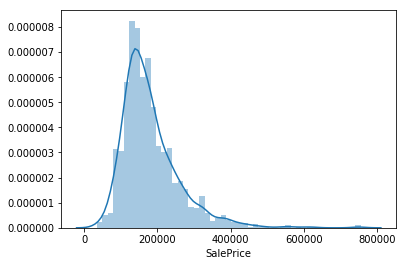

In [11]:
# Run histogram and check the distribution of the target variable
sns.distplot(df_train['SalePrice'])

Note: apparently, SalePrice is not in a normal distribution, so I'm considering doing a log transformation.
Also, I need to deal with the outliers (the expensive houses).

In [12]:
# Check skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


I did some research and made a few educated guesses. I will check the relationships between a few potentially important variables and the target variable.

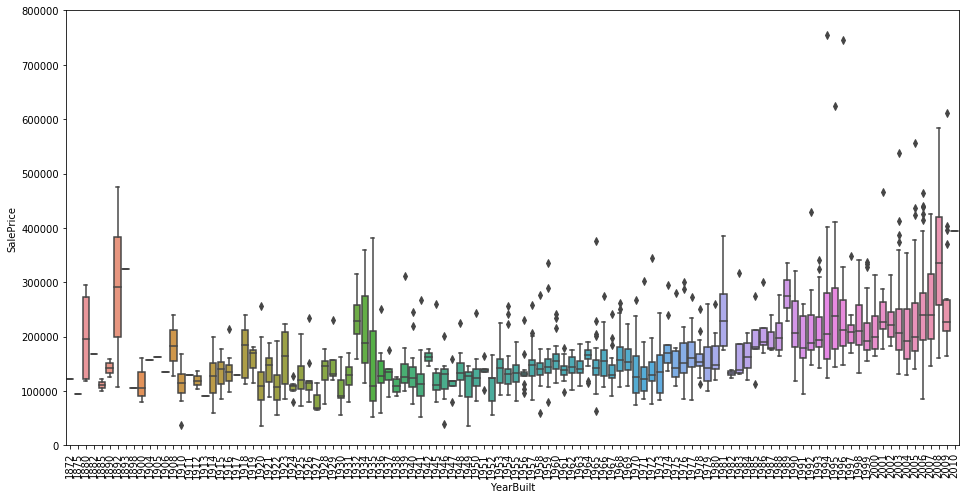

In [13]:
# Age of the house vs. SalePrice
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

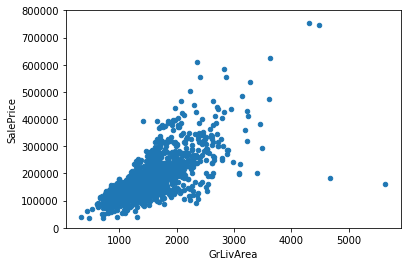

In [14]:
# size vs. saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

I will stop testing other variables for now because I will run feature importance analysis to select potentially important predicting variables.

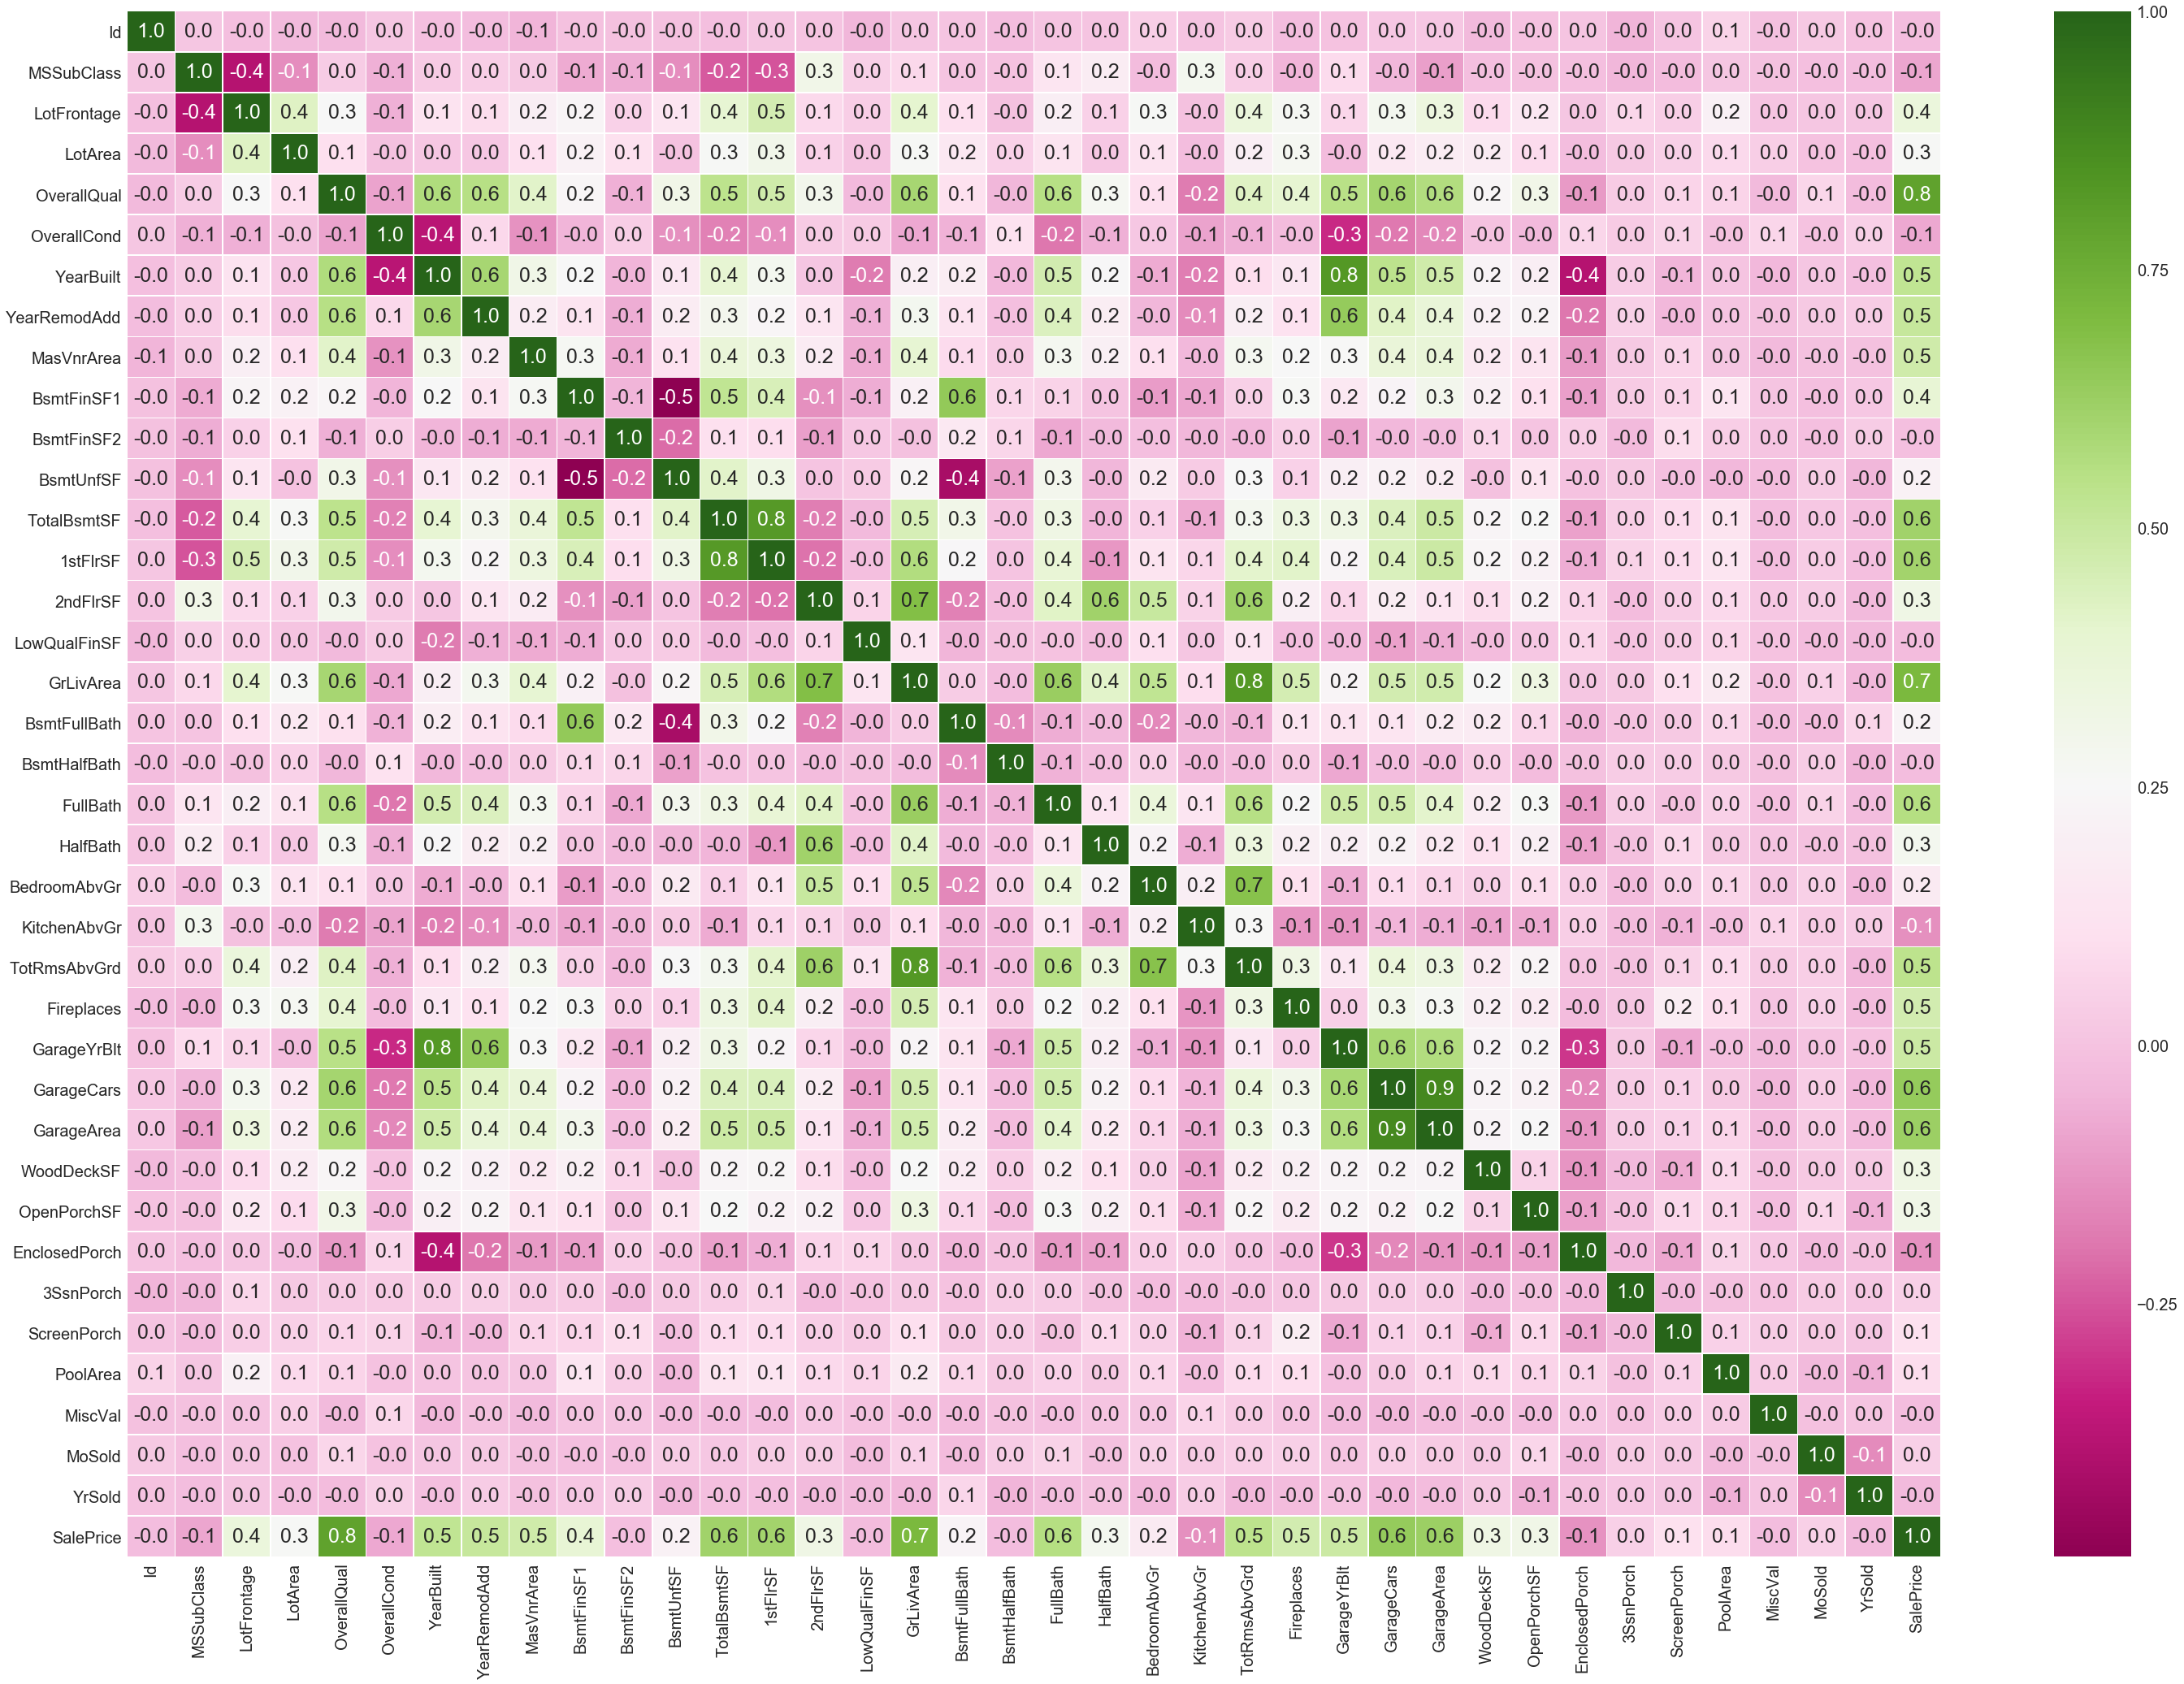

In [15]:
# run correlation matrix (major changes since last time, adding correlation coefficients)
corrmatrix = df_train.corr()
sns.set(font_scale=2)
plt.figure(figsize = (50,35))
ax = sns.heatmap(corrmatrix, annot=True,annot_kws={"size": 25},fmt='.1f',cmap='PiYG', linewidths=.5)

In [16]:
# Find out variables closely correlated with SalePrice
corr_dict=corrmatrix['SalePrice'].sort_values(ascending=False).to_dict()
important_columns=[]
for key,value in corr_dict.items():
    if ((value>0.1) & (value<1)) | (value<=-0.1):
        important_columns.append(key)
print(important_columns)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'EnclosedPorch', 'KitchenAbvGr']


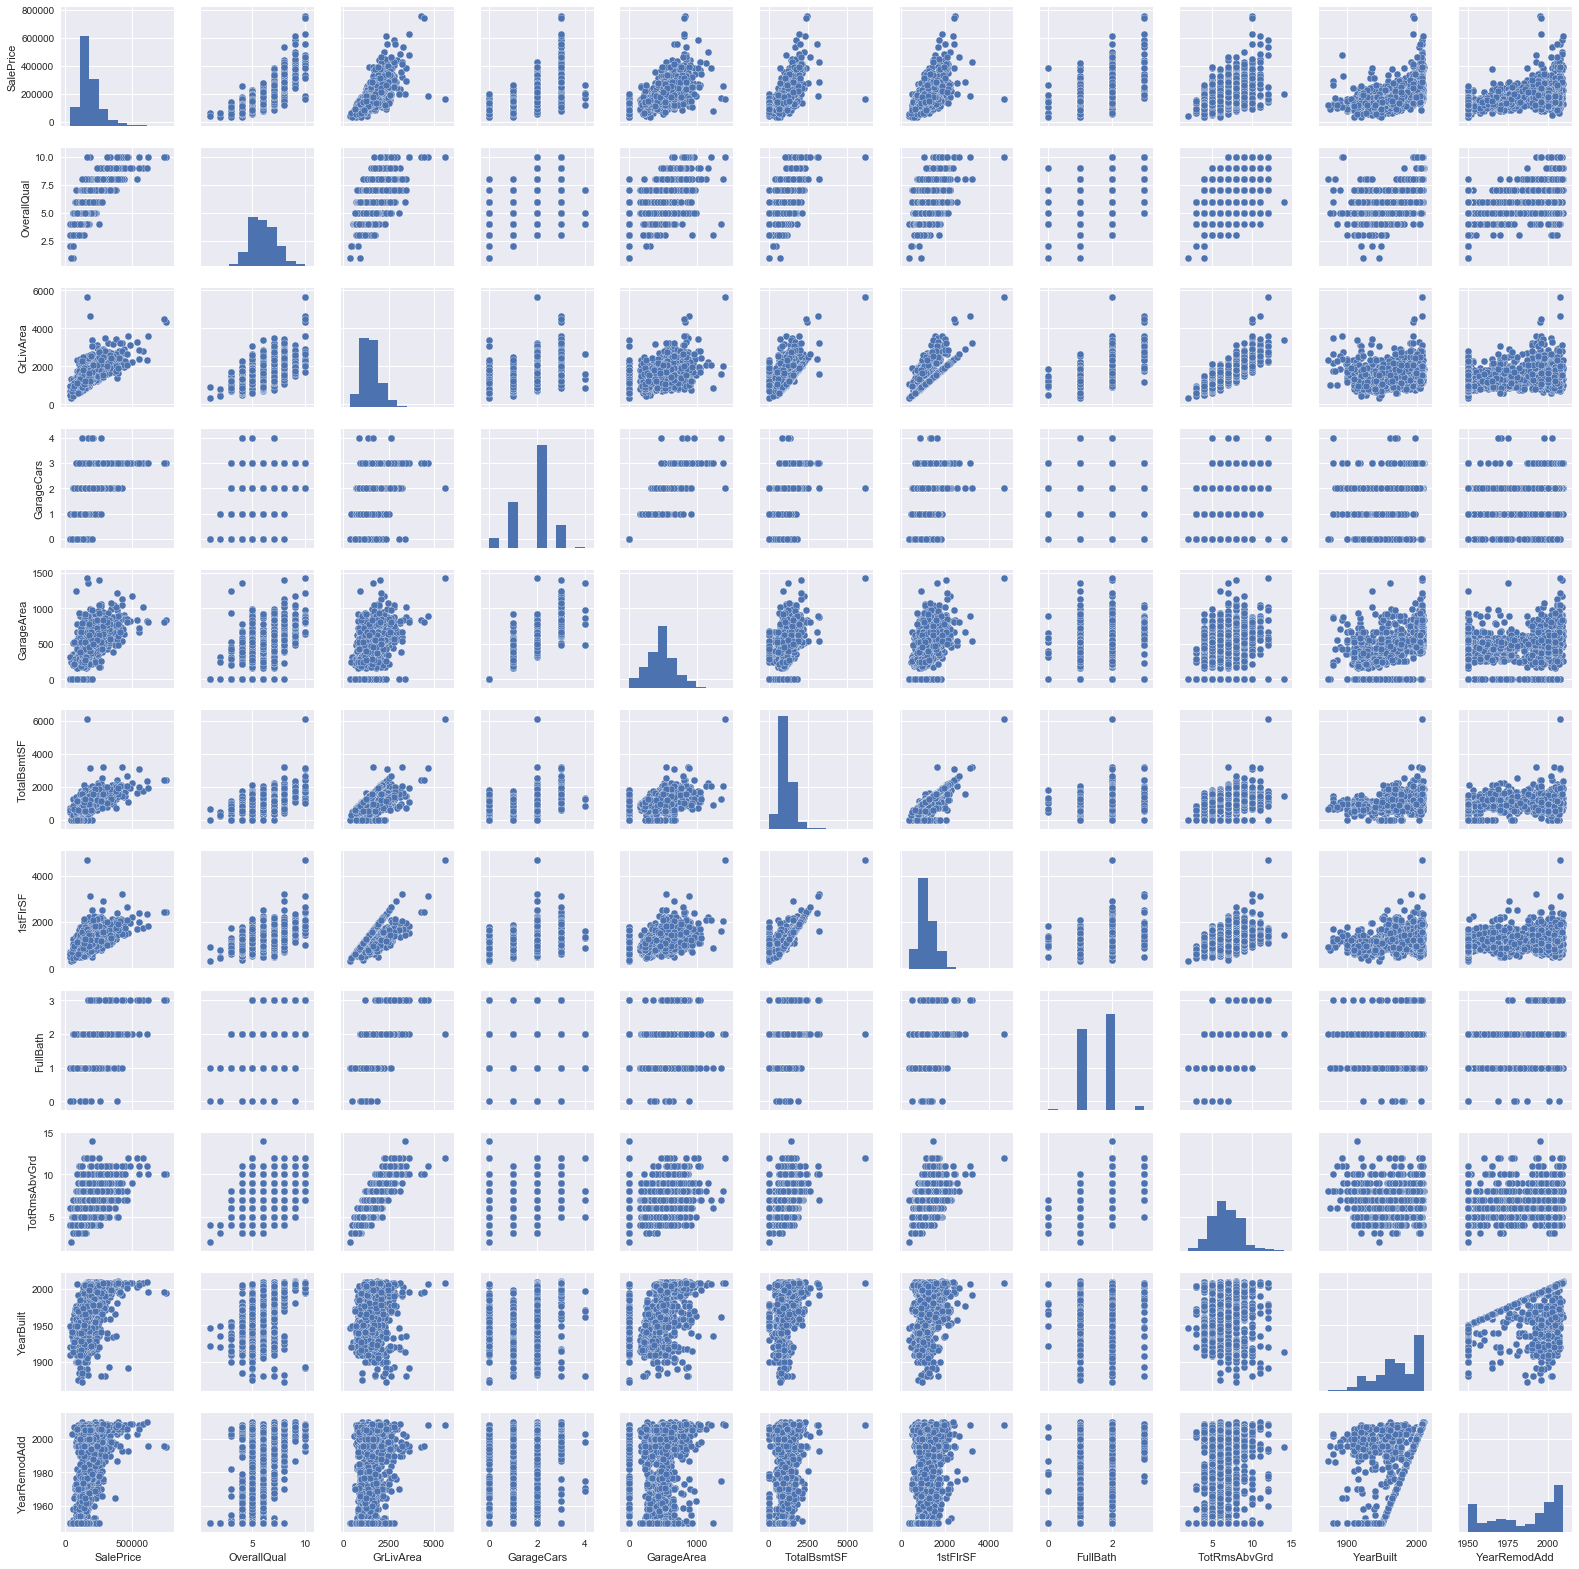

In [7]:
# Select a few potential important factors (top 10 high correaltion with SalePrice) and run the scatterplot
sns.set()
cols = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
sns.pairplot(df_train[cols], size = 2)
plt.show();

From the scatter plot, I can see that there are outliers for some variables. I need to figure out whether I need to do something about these outliers.

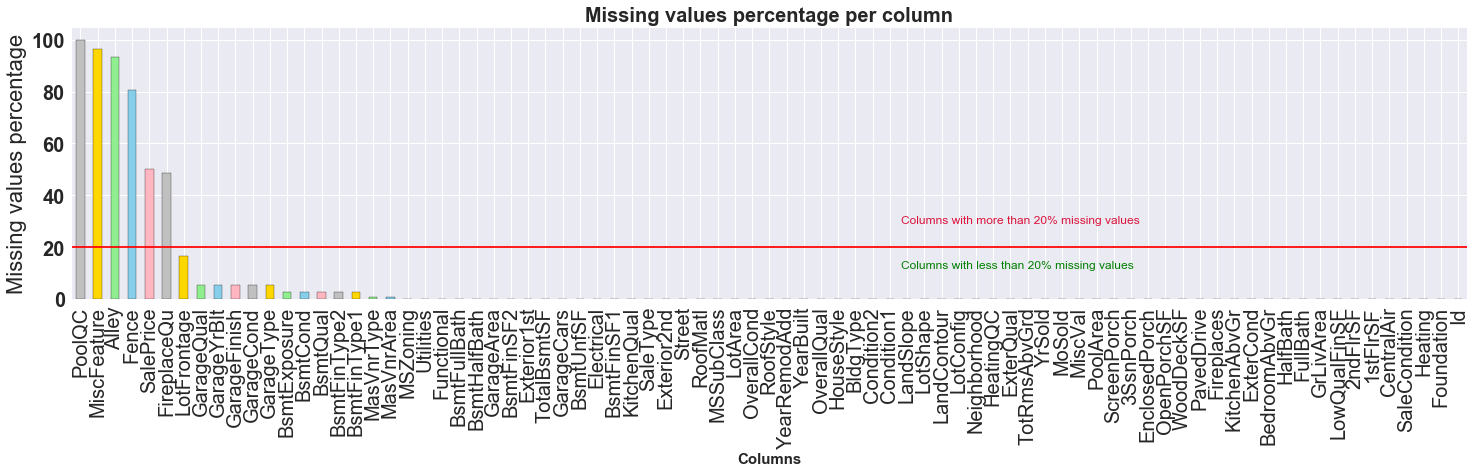

In [40]:
# analyzing missing data, the msv1 function is written by Ami
def msv1(data, thresh=20, color='black', edgecolor='black', width=25, height=5):
    """
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    """
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Columns with more than %s%s missing values' %(thresh, '%'), fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Columns with less than %s%s missing values' %(thresh, '%'), fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()

msv1(train_test, 20, color=('silver', 'gold', 'lightgreen', 'skyblue', 'lightpink'))

### Imputing missing data in the combined dataset

In [52]:
# For variable PoolQC, MiscFeature, Alley, Fench, FireplaceQu, "NA" means no such thing according to the data description.
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'):
    train_test[col] = train_test[col].fillna('None')
# Replacing the missing value for "LotFrontage" with the average of that in the neighborhood
train_test["LotFrontage"] = train_test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.mean()))
# Replacing missing data with None for variables below
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    train_test[col] = train_test[col].fillna('None')
# Replacing missing data with 0 
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea', 'MSZoning'):
    train_test[col] = train_test[col].fillna(0)
# Remove Utilities
train_test = train_test.drop(['Utilities'], axis=1)
# Replace the missing value for the variables below with the most frequent vlues in that col
train_test["Functional"] = train_test["Functional"].fillna("Typ")
for col in ('Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    train_test[col] = train_test[col].fillna(train_test[col].mode()[0])

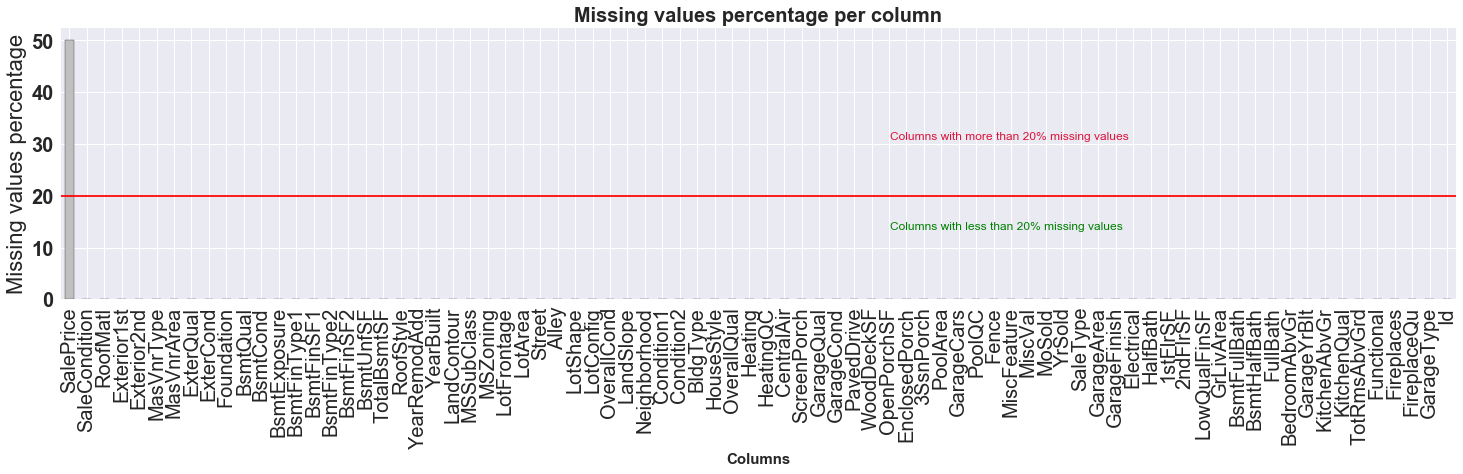

In [53]:
# Run the missing data analysis again to double check
# analyzing missing data, the msv1 function is written by Ami
def msv1(data, thresh=20, color='black', edgecolor='black', width=25, height=5):
    """
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    """
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Columns with more than %s%s missing values' %(thresh, '%'), fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Columns with less than %s%s missing values' %(thresh, '%'), fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()

msv1(train_test, 20, color=('silver', 'gold', 'lightgreen', 'skyblue', 'lightpink'))

In [44]:
#MSSubClass=The building class
train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
#Changing OverallCond into a categorical variable
train_test['OverallCond'] = train_test['OverallCond'].astype(str)
#Year and month sold are transformed into categorical features.
train_test['YrSold'] = train_test['YrSold'].astype(str)
train_test['MoSold'] = train_test['MoSold'].astype(str)

In [47]:
# process columns, apply LabelEncoder to categorical features

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for col in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train_test[col].values)) 
    train_test[col] = lbl.transform(list(train_test[col].values))
    
print('Shape of train_test: {}'.format(train_test.shape))

Shape of train_test: (2919, 80)


In [ ]:
# Adding total sqfootage feature 
train_test['TotalSF'] = train_test['TotalBsmtSF'] + train_test['1stFlrSF'] + train_test['2ndFlrSF']

In [55]:
# Spliting train and test datasets
df_train1 = train_test[:ntrain]
df_test1 = train_test[ntrain:]

In [56]:
# Using one hot coding to recode categorical variables
df_train2=pd.get_dummies(df_train1)
print(df_train1.shape)
print(df_train2.shape)

(1460, 81)
(1460, 290)


In [ ]:
# I've idetified some outliers (e.g., super expensive sale price), although some of them might not be outliers.
# Anyway, I will deal with them later.

In [62]:
# For now, I will do a log transformation on the target variable: SalePrice
df_train2["SalePrice"] = np.log1p(df_train2["SalePrice"])

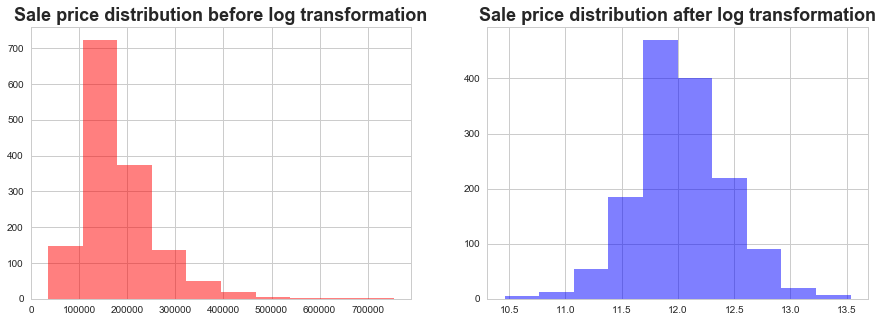

In [63]:
# Using seaborn to visulize the Sale Price before and after the log transformation
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.hist(df_train1.SalePrice, bins=10, color='red',alpha=0.5)
plt.title('Sale price distribution before log transformation',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.hist(df_train2.SalePrice, bins=10, color='blue',alpha=0.5)
plt.title('Sale price distribution after log transformation',weight='bold', fontsize=18)
plt.show()

### Start to work on the ml part of the project. For now I just simply try a few simple algorithms such as regression. I will try more advanced one later.

In [64]:
# Following the ML project convention, I will use X and y to represent the feture set and the target set.

y = df_train2['SalePrice']
X = df_train2.drop(['SalePrice'], axis=1)

In [65]:
print(X.head())
print(y.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  SaleType_New  \
0          2003       196.0       706.0  ...               0             0   
1          1976         0.0       978.0  ...               0             0   
2          2002       162.0       486.0  ...               0             0   
3          1970         0.0       216.0  ...               0             0   
4          2000       350.0       655.0  ...               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorm

In [66]:
# Split the df_train2 datasets into training and testing datasets. Please note this is not talking about the original train and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .3, random_state=0)

In [67]:
# Simply run random forest as a base model. I need to figure out the error reasons but will stop for now.
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [52]:
# I will keep working on this project.